# Алгоритмы анализа данных

## Тема 7. Классификация с помощью KNN. Кластеризация K-means

#### Задание 1. 
К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от номера соседа

In [1]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

In [4]:
X_train

array([[6.1, 3. ],
       [7.7, 3. ],
       [5.6, 2.5],
       [6.4, 2.8],
       [5.8, 2.8],
       [5.3, 3.7],
       [5.5, 2.3],
       [5.2, 3.4],
       [6.5, 2.8],
       [6.7, 2.5],
       [6.8, 3. ],
       [5.1, 3.5],
       [6. , 2.2],
       [6.3, 2.9],
       [6.6, 2.9],
       [7.7, 2.6],
       [5.7, 3.8],
       [5. , 3.6],
       [4.8, 3. ],
       [5.2, 2.7],
       [5.1, 3.4],
       [5.5, 3.5],
       [7.7, 3.8],
       [6.9, 3.1],
       [7.3, 2.9],
       [6.4, 2.8],
       [6.2, 2.8],
       [6. , 3.4],
       [7.7, 2.8],
       [5.7, 3. ],
       [4.8, 3.4],
       [5.7, 2.5],
       [6.3, 2.7],
       [4.8, 3. ],
       [4.7, 3.2],
       [6.5, 3. ],
       [4.6, 3.4],
       [6.1, 3. ],
       [6.5, 3.2],
       [6.7, 3.1],
       [5.7, 2.8],
       [6.7, 3.3],
       [6. , 3. ],
       [5.1, 3.8],
       [6. , 2.2],
       [6.4, 2.9],
       [6.5, 3. ],
       [5. , 2.3],
       [6.3, 3.3],
       [5.5, 2.5],
       [5.4, 3.7],
       [4.9, 3.1],
       [5.2,

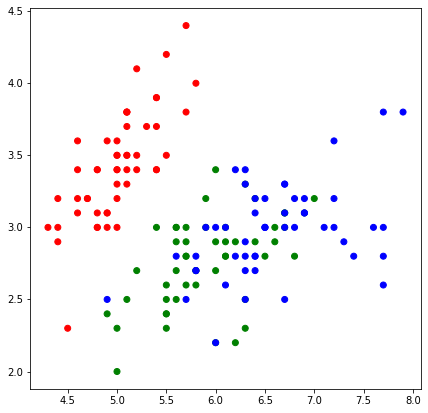

In [5]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

Используем евклидову метрику. Реализуем функцию для ее подсчета.

In [6]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

Добавим вес от номера соседа по формуле $w(i) = \frac{1}{i}$;

Реализуем алгоритм поиска k ближайших соседей.

In [7]:
def knn_i(x_train, y_train, x_test, k, q):
    
    answers = []
    for x in x_test:
        test_distances = []
        
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и добавляем вес от номера соседа
        for d in sorted(test_distances)[0:k]:
            w = 1 / d[0]           
            classes[d[1]] += w
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

#### Задание 2.
К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от расстояния до соседа. Сравнить метрики качества и сложность разделяющей гиперплоскости. Сделать выводы.

Добавим веса от расстояния $w(d) = q^{d}$, $q \in (0,1)$

In [8]:
def knn_d(x_train, y_train, x_test, k, q):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и добавим вес от расстояния
        for d in sorted(test_distances)[0:k]:
            w = q**d[0]
            classes[d[1]] += w
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

#### Задание 3.
Настроить оптимальное значение числа соседей для моделей из п.1 и п.2, сделать выводы.

In [9]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

Построим график распределения классов.

In [10]:
def get_graph(X_train, y_train, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

In [15]:
import matplotlib as mpl
mpl.rcParams['pcolor.shading'] = 'auto'

C:\Users\lenas\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in double_scalars


Точность алгоритма при k = 1: 0.667


C:\Users\lenas\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


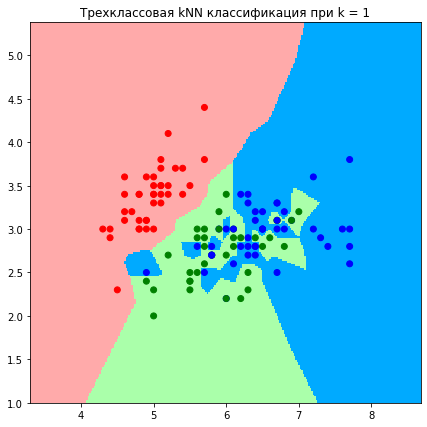

Точность алгоритма при k = 2: 0.733


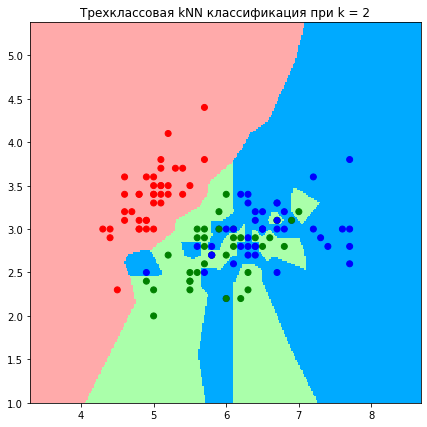

Точность алгоритма при k = 3: 0.767


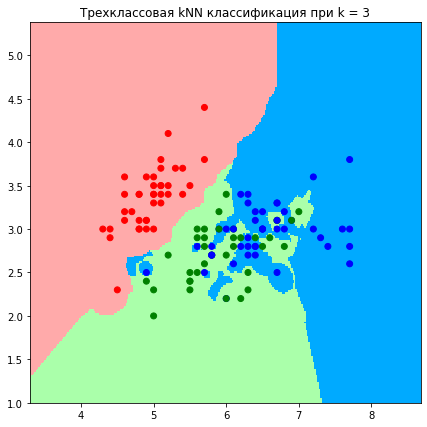

Точность алгоритма при k = 4: 0.800


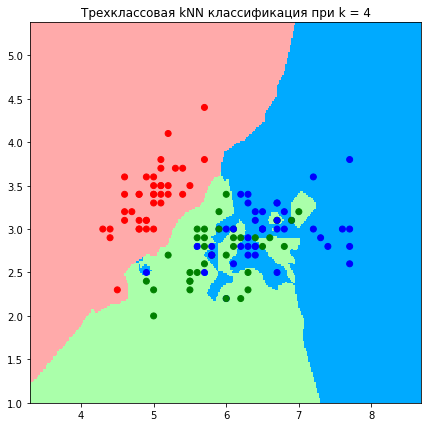

Точность алгоритма при k = 5: 0.833


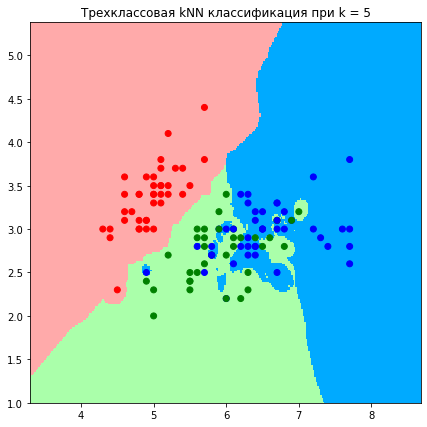

Точность алгоритма при k = 6: 0.833


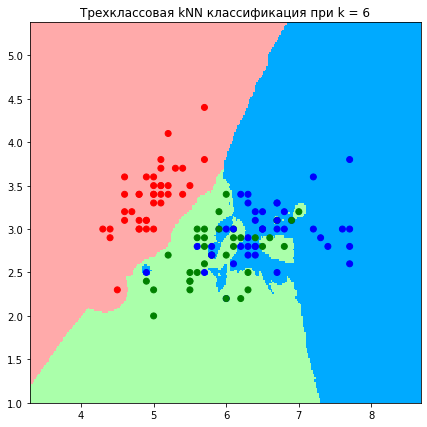

Точность алгоритма при k = 7: 0.800


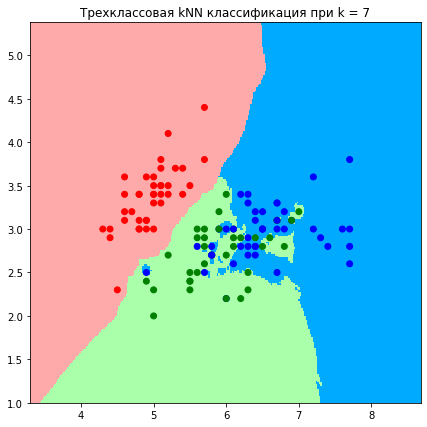

Точность алгоритма при k = 8: 0.800


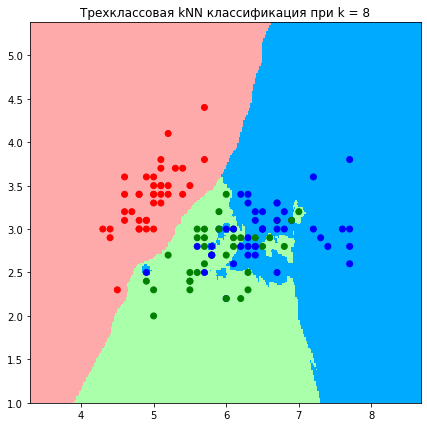

Точность алгоритма при k = 9: 0.833


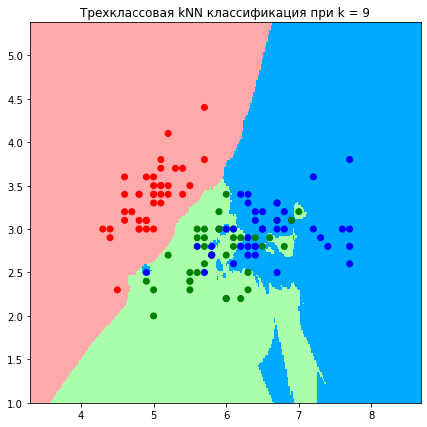

Точность алгоритма при k = 10: 0.833


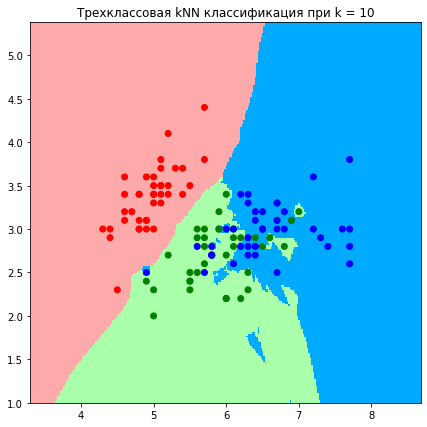

In [13]:
k = [_ for _ in range(1, 11)]

for num in k:   
    y_pred = knn_i(X_train, y_train, X_test, num, 1)
    print(f'Точность алгоритма при k = {num}: {accuracy(y_pred, y_test):.3f}')
    
    # Визуализируем распределение классов
    
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = knn_i(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], num, 1)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {num}")
    plt.show()

Точность алгоритма при k = 1: 0.667


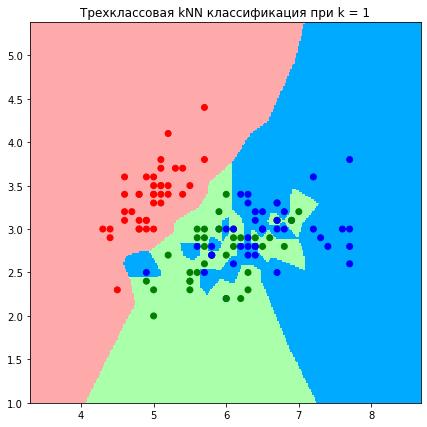

Точность алгоритма при k = 2: 0.667


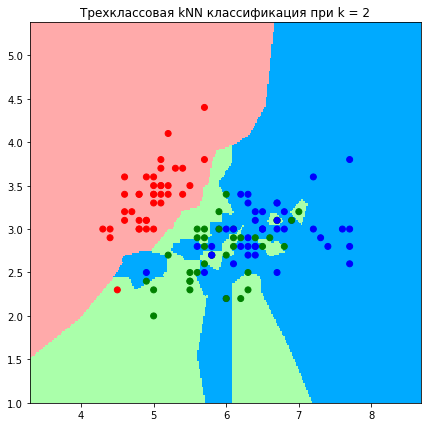

Точность алгоритма при k = 3: 0.733


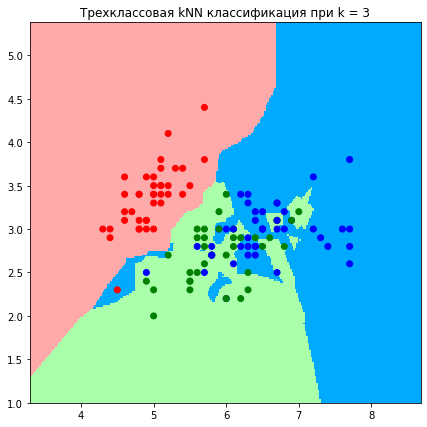

Точность алгоритма при k = 4: 0.833


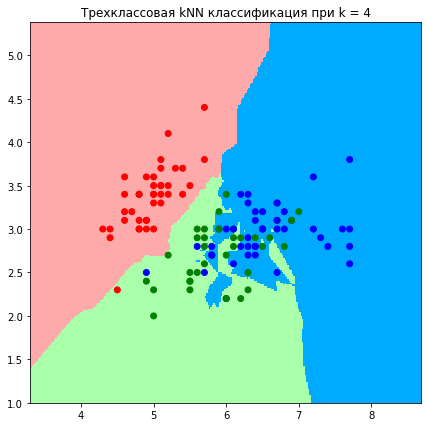

Точность алгоритма при k = 5: 0.867


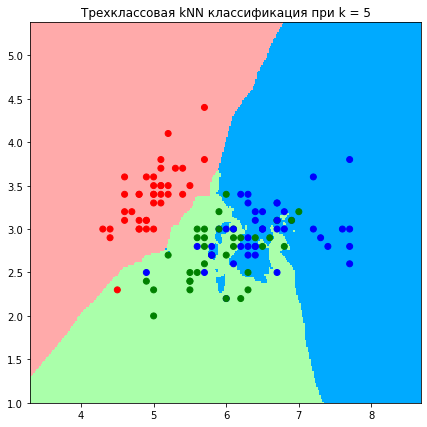

Точность алгоритма при k = 6: 0.833


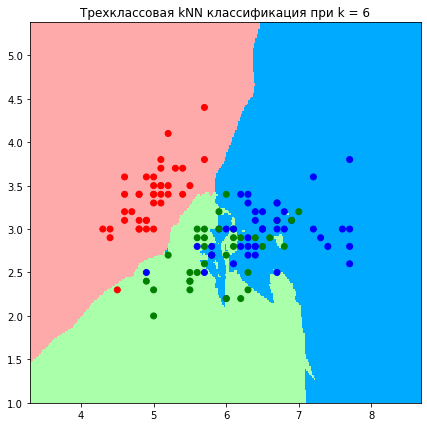

Точность алгоритма при k = 7: 0.800


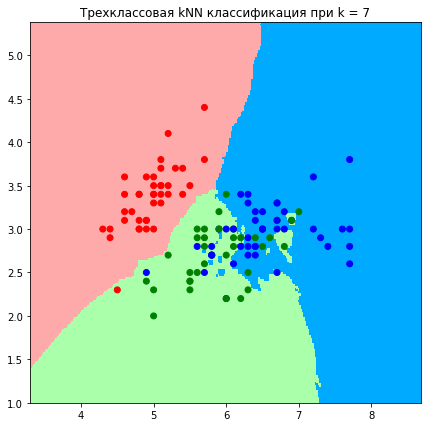

Точность алгоритма при k = 8: 0.800


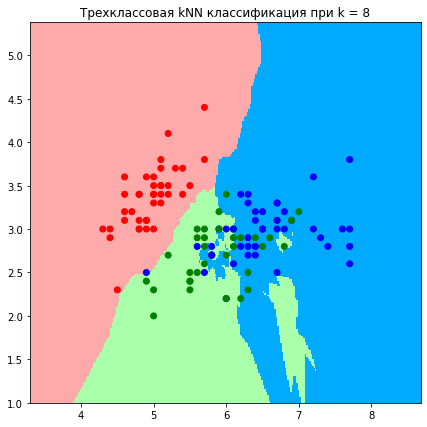

Точность алгоритма при k = 9: 0.867


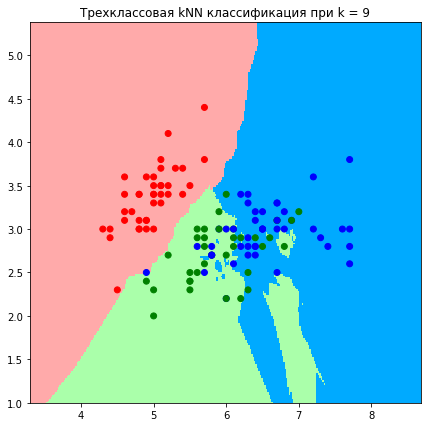

Точность алгоритма при k = 10: 0.833


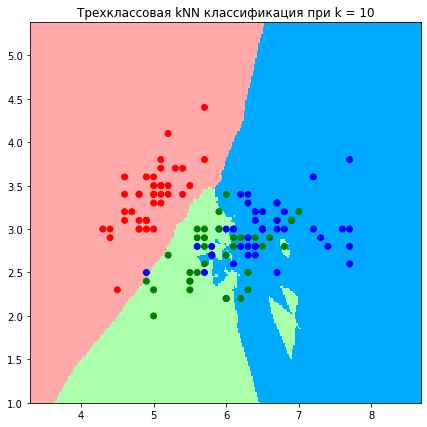

In [16]:
k = [_ for _ in range(1, 11)]

for num in k:   
    y_pred = knn_d(X_train, y_train, X_test, num, 1)
    print(f'Точность алгоритма при k = {num}: {accuracy(y_pred, y_test):.3f}')
    
     # Визуализируем распределение классов
    
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = knn_d(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], num, 1)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {num}")
    plt.show()

Для анализа были взята модель knn с добавление весов для соседей в зависимости от номера соседа и модель с добавлением весов для соседей в зависимости от расстояния до соседа.

Для первой модели оптимальное число соседей - 5 (acc=0.833). Accuracy с увеличением количества соседей увеличивается, и в итоге остается примерно одинаковым. Что касается гиперплоскостей, то с увеличением числа соседей, гиперплоскость становится немного проще. Но явного обобщения я не заметила.

Во второй модели в качестве весов было взято расстояние до соседа. Оптимальное число соседей равно также 5, но accuracy выше, чем на первой модели (acc=0.867). До 5 соседей accuracy увеличивается, потом начинает скакать. Гиперплоскость с увеличением соседей лучше обощает, но метрика качества лучшая на количестве соседей 5 и 9. 

Если сравнивать две модели по гиперплоскостям, то вторая модель (вес звисит от расстояния) больше обобщает данные, меньше под них подстраивается и при этом имеет более высокую метрику качества.
